In [2]:
import csv

# Function to read and process the CSV file
def process_measurements(file_path):
    measurements = {}
    current_marking = None

    # Read the CSV file
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if not row:
                continue
            if row[0].startswith('M'):
                current_marking = row[0]
                measurements[current_marking] = []
            else:
                if current_marking is not None:
                    measurements[current_marking].append(int(row[0]))

    # Convert the dictionary to a list of lists
    measurement_lists = [measurements[f'M{i}'] for i in range(1, 20)]
    return measurement_lists

# Specify the path to your CSV file
file_path = 'measurements.csv'

# Process the measurements
measurement_arrays = process_measurements(file_path)

# Print the lengths of the arrays
for i, array in enumerate(measurement_arrays, start=1):
    print(f'M{i}: {len(array)}')


M1: 16000
M2: 16000
M3: 16000
M4: 16000
M5: 16000
M6: 16000
M7: 16000
M8: 16000
M9: 16000
M10: 16000
M11: 16000
M12: 16000
M13: 16000
M14: 16000
M15: 16000
M16: 16000
M17: 16000
M18: 16000
M19: 16000


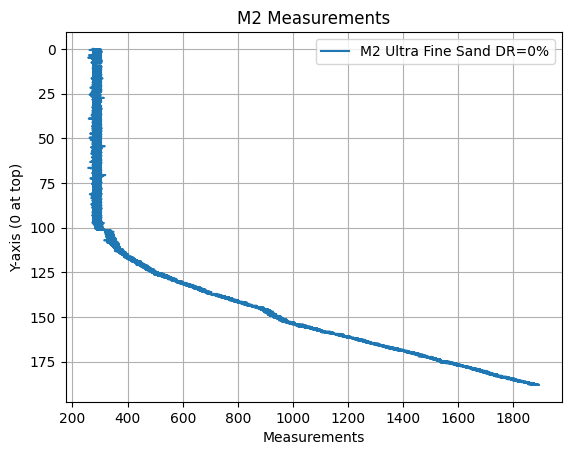

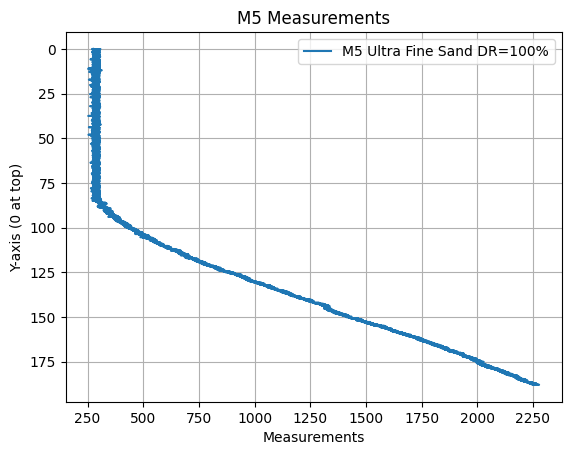

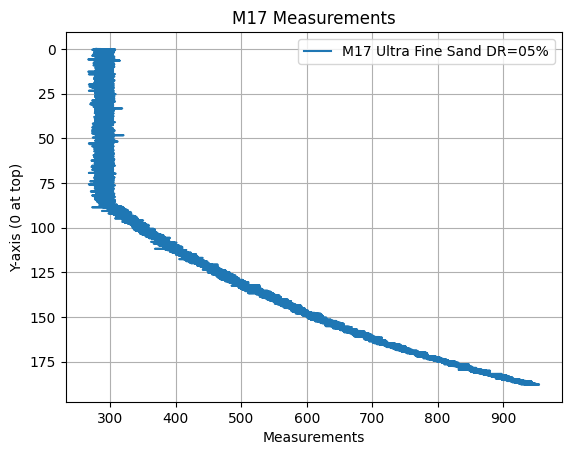

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Function to read and process the CSV file

# Plot the measurements for M2, M5, and M17
markings_to_plot = [2, 5, 17]
labels = [
    "M2 Ultra Fine Sand DR=0%",
    "M5 Ultra Fine Sand DR=100%",
    "M17 Ultra Fine Sand DR=05%"
]

for marking, label in zip(markings_to_plot, labels):
    measurements = measurement_arrays[marking - 1]
    y_values = np.linspace(0, 188, len(measurements))

    plt.figure()
    plt.plot(measurements, y_values, label=label)
    plt.gca().invert_yaxis()  # Invert the y-axis
    plt.xlabel('Measurements')
    plt.ylabel('Y-axis (0 at top)')
    plt.title(f'M{marking} Measurements')
    plt.legend()
    plt.grid(True)

    plt.show()


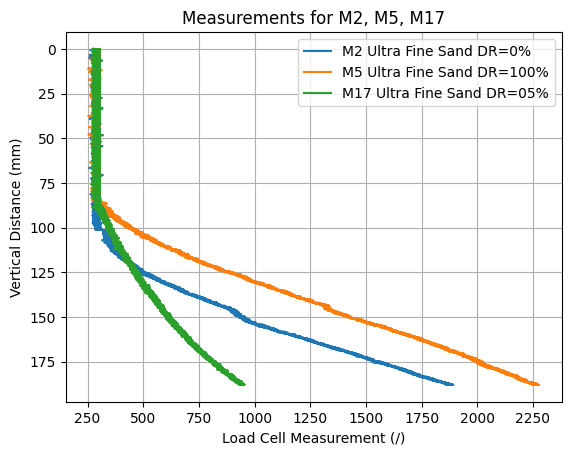

In [16]:
markings_to_plot = [2, 5, 17]
labels = [
    "M2 Ultra Fine Sand DR=0%",
    "M5 Ultra Fine Sand DR=100%",
    "M17 Ultra Fine Sand DR=50%"
]

plt.figure()

for marking, label in zip(markings_to_plot, labels):
    measurements = measurement_arrays[marking - 1]
    y_values = np.linspace(0, 188, len(measurements))
    plt.plot(measurements, y_values, label=label)

plt.gca().invert_yaxis()  # Invert the y-axis
plt.xlabel('Load Cell Measurement (/)')
plt.ylabel('Vertical Distance (mm)')
plt.title('Measurements for M2, M5, M17')
plt.legend()
plt.grid(True)

plt.show()

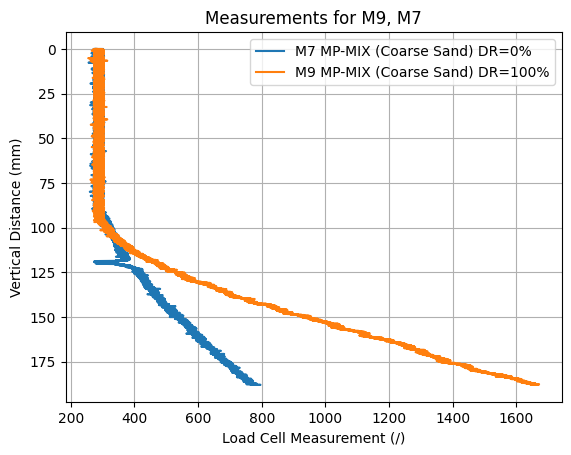

In [ ]:
markings_to_plot = [7, 9]
labels = [
    "M7 MP-MIX (Coarse Sand) DR=0%",
    "M9 MP-MIX (Coarse Sand) DR=100%"
]

plt.figure()

for marking, label in zip(markings_to_plot, labels):
    measurements = measurement_arrays[marking - 1]
    y_values = np.linspace(0, 188, len(measurements))
    plt.plot(measurements, y_values, label=label)

plt.gca().invert_yaxis()  # Invert the y-axis
plt.xlabel('Load Cell Measurement (/)')
plt.ylabel('Vertical Distance (mm)')
plt.title('Measurements for M9, M7')
plt.legend()
plt.grid(True)

plt.show()

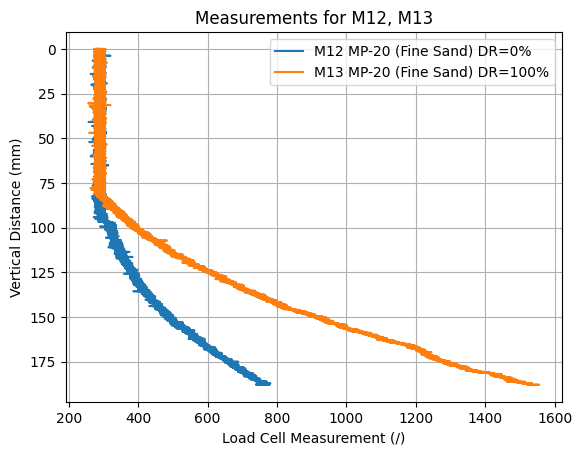

In [ ]:
markings_to_plot = [12, 13]
labels = [
    "M12 MP-20 (Fine Sand) DR=0%",
    "M13 MP-20 (Fine Sand) DR=100%"
]

plt.figure()

for marking, label in zip(markings_to_plot, labels):
    measurements = measurement_arrays[marking - 1]
    y_values = np.linspace(0, 188, len(measurements))
    plt.plot(measurements, y_values, label=label)

plt.gca().invert_yaxis()  # Invert the y-axis
plt.xlabel('Load Cell Measurement (/)')
plt.ylabel('Vertical Distance (mm)')
plt.title('Measurements for M12, M13')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data setup
data = {
    320: [526, 511, 526, 537, 511, 508, 511, 511, 523, 545, 509],
    2660: [2486, 2483, 2486, 2482, 2480, 2486, 2486, 2503, 2479, 2483, 2481, 2482, 2482, 2489],
    0: [285, 284, 295, 299, 288, 290, 286, 289, 305, 285, 286, 283, 304],
    1250: [1243, 1247, 1241, 1241, 1240, 1239, 1240, 1245, 1239, 1245, 1245, 1243],
    430: [610, 608, 607, 611, 617, 608, 614, 593, 607, 608],
    2005: [1856, 1858, 1863, 1856, 1861, 1859, 1862, 1856, 1857]
}

# Prepare the data for linear regression
sensor_values = []
real_values = []

for real, sensor_list in data.items():
    for sensor in sensor_list:
        sensor_values.append(sensor)
        real_values.append(real)

sensor_values = np.array(sensor_values).reshape(-1, 1)
real_values = np.array(real_values)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(sensor_values, real_values)

# Function to calibrate sensor value
def calibrate(sensor_value):
    return model.predict(np.array([[sensor_value]]))[0]

# Testing the calibration
test_sensor_value = 526
calibrated_value = calibrate(test_sensor_value)
print(f"The calibrated value for sensor reading {test_sensor_value} is {calibrated_value:.2f}g")

# Optionally, print the model parameters
print(f"Model coefficient (slope): {model.coef_[0]:.4f}")
print(f"Model intercept: {model.intercept_:.4f}")


The calibrated value for sensor reading 526 is 327.20g
Model coefficient (slope): 1.2148
Model intercept: -311.7735


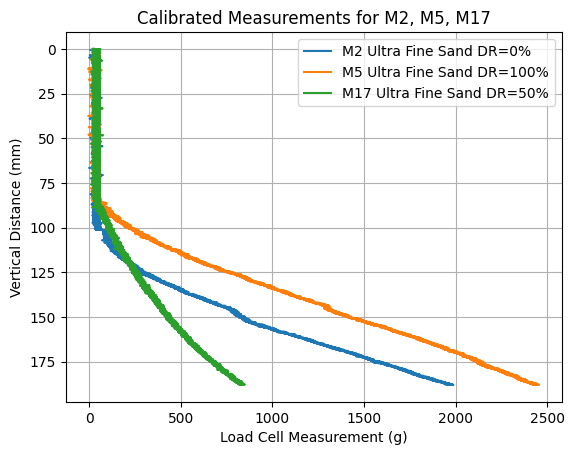

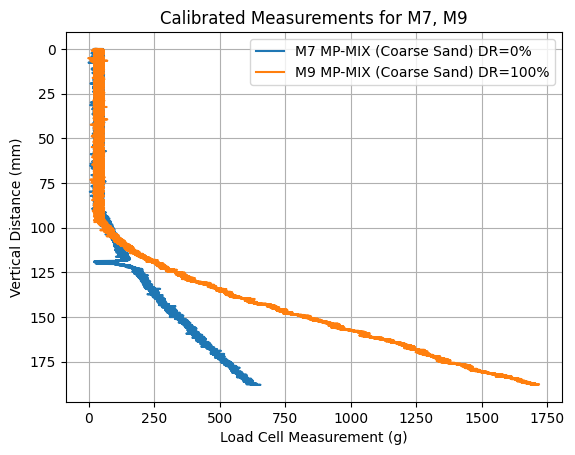

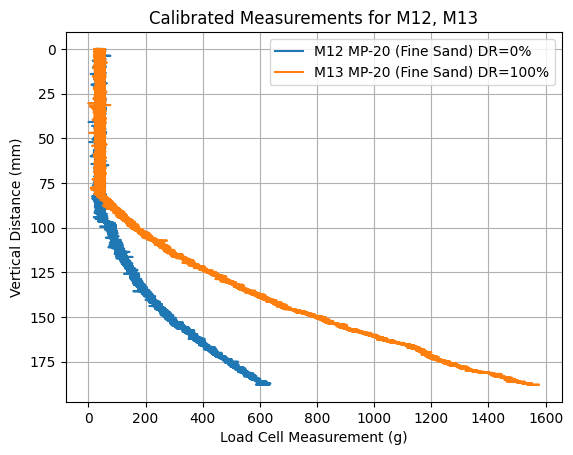

In [ ]:
def apply_calibration(measurement_arrays):
    calibrated_arrays = []
    for measurements in measurement_arrays:
        calibrated_measurements = [calibrate(value) for value in measurements]
        calibrated_arrays.append(calibrated_measurements)
    return calibrated_arrays

# Apply calibration to M2, M5, and M17
measurement_arrays = process_measurements(file_path)
markings_to_plot = [2, 5, 17]
labels = [
    "M2 Ultra Fine Sand DR=0%",
    "M5 Ultra Fine Sand DR=100%",
    "M17 Ultra Fine Sand DR=50%"
]

# Prepare calibrated data for plotting
calibrated_data = apply_calibration([measurement_arrays[i-1] for i in markings_to_plot])

# Plot the calibrated measurements for M2, M5, and M17 on a single graph
plt.figure()

for measurements, label in zip(calibrated_data, labels):
    y_values = np.linspace(0, 188, len(measurements))
    plt.plot(measurements, y_values, label=label)

plt.gca().invert_yaxis()  # Invert the y-axis
plt.xlabel('Load Cell Measurement (g)')
plt.ylabel('Vertical Distance (mm)')
plt.title('Calibrated Measurements for M2, M5, M17')
plt.legend()
plt.grid(True)

plt.show()

measurement_arrays = process_measurements(file_path)
markings_to_plot = [7, 9]
labels = [
    "M7 MP-MIX (Coarse Sand) DR=0%",
    "M9 MP-MIX (Coarse Sand) DR=100%"
]

# Prepare calibrated data for plotting
calibrated_data = apply_calibration([measurement_arrays[i-1] for i in markings_to_plot])

# Plot the calibrated measurements for M2, M5, and M17 on a single graph
plt.figure()

for measurements, label in zip(calibrated_data, labels):
    y_values = np.linspace(0, 188, len(measurements))
    plt.plot(measurements, y_values, label=label)

plt.gca().invert_yaxis()  # Invert the y-axis
plt.xlabel('Load Cell Measurement (g)')
plt.ylabel('Vertical Distance (mm)')
plt.title('Calibrated Measurements for M7, M9')
plt.legend()
plt.grid(True)

plt.show()

measurement_arrays = process_measurements(file_path)
markings_to_plot = [12, 13]
labels = [
    "M12 MP-20 (Fine Sand) DR=0%",
    "M13 MP-20 (Fine Sand) DR=100%"
]


# Prepare calibrated data for plotting
calibrated_data = apply_calibration([measurement_arrays[i-1] for i in markings_to_plot])

# Plot the calibrated measurements for M2, M5, and M17 on a single graph
plt.figure()

for measurements, label in zip(calibrated_data, labels):
    y_values = np.linspace(0, 188, len(measurements))
    plt.plot(measurements, y_values, label=label)

plt.gca().invert_yaxis()  # Invert the y-axis
plt.xlabel('Load Cell Measurement (g)')
plt.ylabel('Vertical Distance (mm)')
plt.title('Calibrated Measurements for M12, M13')
plt.legend()
plt.grid(True)

plt.show()


# Testing the calibration with an example sensor value
# test_sensor_value = 526
# calibrated_value = calibrate(test_sensor_value)
# print(f"The calibrated value for sensor reading {test_sensor_value} is {calibrated_value:.2f}g")

# # Optionally, print the model parameters
# print(f"Model coefficient (slope): {model.coef_[0]:.4f}")
# print(f"Model intercept: {model.intercept_:.4f}")

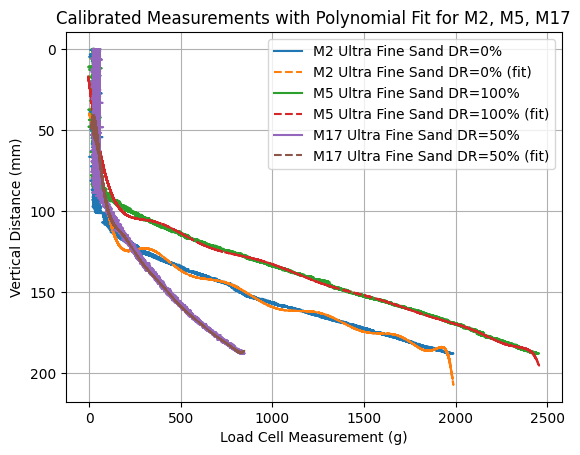

In [ ]:
measurement_arrays = process_measurements(file_path)
markings_to_plot = [2, 5, 17]
labels = [
    "M2 Ultra Fine Sand DR=0%",
    "M5 Ultra Fine Sand DR=100%",
    "M17 Ultra Fine Sand DR=50%"
]

# Prepare calibrated data for plotting
calibrated_data = apply_calibration([measurement_arrays[i-1] for i in markings_to_plot])

# Plot the calibrated measurements for M2, M5, and M17 on a single graph
plt.figure()

for measurements, label in zip(calibrated_data, labels):
    y_values = np.linspace(0, 188, len(measurements))
    plt.plot(measurements, y_values, label=label)
    
    # Fit a polynomial of degree 2 (quadratic)
    polynomial_coefficients = np.polyfit(measurements, y_values, 12)
    polynomial = np.poly1d(polynomial_coefficients)
    y_fit = polynomial(measurements)
    
    plt.plot(measurements, y_fit, linestyle='--', label=f'{label} (fit)')

plt.gca().invert_yaxis()  # Invert the y-axis
plt.xlabel('Load Cell Measurement (g)')
plt.ylabel('Vertical Distance (mm)')
plt.title('Calibrated Measurements with Polynomial Fit for M2, M5, M17')
plt.legend()
plt.grid(True)

plt.show()

In [8]:
import csv
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to read and process the CSV file
def process_measurements(file_path):
    measurements = {}
    current_marking = None

    # Read the CSV file
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if not row:
                continue
            if row[0].startswith('M'):
                current_marking = row[0]
                measurements[current_marking] = []
            else:
                if current_marking is not None:
                    measurements[current_marking].append(int(row[0]))

    return measurements

# Map measurement to sand type and relative density
measurement_info = {
    'M2': ('ultrafine', 0),
    'M5': ('ultrafine', 100),
    'M7': ('coarse', 0),
    'M9': ('coarse', 100),
    'M12': ('fine', 0),
    'M13': ('fine', 100)
}

# Specify the path to your CSV file
file_path = 'measurements.csv'

# Process the measurements
measurements = process_measurements(file_path)

# Prepare the data for regression
X = []
y = []

for marking, values in measurements.items():
    if marking in measurement_info:
        sand_type, density = measurement_info[marking]
        # Encode sand type as integers (e.g., ultrafine=0, fine=1, coarse=2)
        sand_type_code = {'ultrafine': 0, 'fine': 1, 'coarse': 2}[sand_type]
        for value in values:
            X.append([value])
            y.append([sand_type_code, density])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the labels for sand type and density
y_train_sand_type = y_train[:, 0]
y_train_density = y_train[:, 1]
y_test_sand_type = y_test[:, 0]
y_test_density = y_test[:, 1]

# Train logistic regression models
sand_type_model = LogisticRegression(max_iter=10000)
density_model = LogisticRegression(max_iter=10000)

sand_type_model.fit(X_train, y_train_sand_type)
density_model.fit(X_train, y_train_density)

# Predict on the test set
y_pred_sand_type = sand_type_model.predict(X_test)
y_pred_density = density_model.predict(X_test)

# Calculate accuracy
sand_type_accuracy = accuracy_score(y_test_sand_type, y_pred_sand_type)
density_accuracy = accuracy_score(y_test_density, y_pred_density)

print(f'Sand Type Classification Accuracy: {sand_type_accuracy}')
print(f'Relative Density Classification Accuracy: {density_accuracy}')


Sand Type Classification Accuracy: 0.36854166666666666
Relative Density Classification Accuracy: 0.5711979166666666


In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Compute precision, recall, and F1-score for sand type
precision_sand_type = precision_score(y_test_sand_type, y_pred_sand_type, average='weighted')
recall_sand_type = recall_score(y_test_sand_type, y_pred_sand_type, average='weighted')
f1_sand_type = f1_score(y_test_sand_type, y_pred_sand_type, average='weighted')
conf_matrix_sand_type = confusion_matrix(y_test_sand_type, y_pred_sand_type)

# Compute precision, recall, and F1-score for density
precision_density = precision_score(y_test_density, y_pred_density, average='weighted')
recall_density = recall_score(y_test_density, y_pred_density, average='weighted')
f1_density = f1_score(y_test_density, y_pred_density, average='weighted')
conf_matrix_density = confusion_matrix(y_test_density, y_pred_density)

print(f'Sand Type Classification Accuracy: {sand_type_accuracy}')
print(f'Sand Type Precision: {precision_sand_type}')
print(f'Sand Type Recall: {recall_sand_type}')
print(f'Sand Type F1-Score: {f1_sand_type}')
print(f'Sand Type Confusion Matrix:\n {conf_matrix_sand_type}')

print(f'Relative Density Classification Accuracy: {density_accuracy}')
print(f'Relative Density Precision: {precision_density}')
print(f'Relative Density Recall: {recall_density}')
print(f'Relative Density F1-Score: {f1_density}')
print(f'Relative Density Confusion Matrix:\n {conf_matrix_density}')


C:\Users\TRD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Sand Type Classification Accuracy: 0.36854166666666666
Sand Type Precision: 0.2528417158993215
Sand Type Recall: 0.36854166666666666
Sand Type F1-Score: 0.28606988352564355
Sand Type Confusion Matrix:
 [[2292 4029    0]
 [1606 4784    0]
 [1637 4852    0]]
Relative Density Classification Accuracy: 0.5711979166666666
Relative Density Precision: 0.5803441546250083
Relative Density Recall: 0.5711979166666666
Relative Density F1-Score: 0.5546811371960803
Relative Density Confusion Matrix:
 [[7393 2331]
 [5902 3574]]


In [6]:
def predict_sand_properties(measurement_values):
    sand_type_predictions = sand_type_model.predict(np.array(measurement_values).reshape(-1, 1))
    density_predictions = density_model.predict(np.array(measurement_values).reshape(-1, 1))

    # Get the most frequent prediction for sand type and density
    sand_type_code = np.bincount(sand_type_predictions).argmax()
    density = np.bincount(density_predictions).argmax()
    
    sand_type = {0: 'ultrafine', 1: 'fine', 2: 'coarse'}[sand_type_code]
    return sand_type, density

# Example usage of the prediction function
new_measurement_values = measurement_arrays[7]  # Replace with actual measurement values
predicted_sand_type, predicted_density = predict_sand_properties(new_measurement_values)
print(f'Predicted Sand Type: {predicted_sand_type}')
print(f'Predicted Relative Density: {predicted_density}')


Predicted Sand Type: fine
Predicted Relative Density: 0


In [9]:
import csv
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Function to read and process the CSV file
def process_measurements(file_path):
    measurements = {}
    current_marking = None

    # Read the CSV file
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if not row:
                continue
            if row[0].startswith('M'):
                current_marking = row[0]
                measurements[current_marking] = []
            else:
                if current_marking is not None:
                    measurements[current_marking].append(int(row[0]))

    return measurements

# Map measurement to sand type and relative density
measurement_info = {
    'M2': ('ultrafine', 0),
    'M5': ('ultrafine', 100),
    'M7': ('coarse', 0),
    'M9': ('coarse', 100),
    'M12': ('fine', 0),
    'M13': ('fine', 100)
}

# Specify the path to your CSV file
file_path = 'measurements.csv'

# Process the measurements
measurements = process_measurements(file_path)

# Prepare the data for regression
X = []
y = []

for marking, values in measurements.items():
    if marking in measurement_info:
        sand_type, density = measurement_info[marking]
        # Encode sand type as integers (e.g., ultrafine=0, fine=1, coarse=2)
        sand_type_code = {'ultrafine': 0, 'fine': 1, 'coarse': 2}[sand_type]
        for value in values:
            X.append([value])
            y.append([sand_type_code, density])

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the labels for sand type and density
y_train_sand_type = y_train[:, 0]
y_train_density = y_train[:, 1]
y_test_sand_type = y_test[:, 0]
y_test_density = y_test[:, 1]

# Create a pipeline with polynomial features and logistic regression
pipeline_sand_type = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline_density = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression(max_iter=1000))
])

# Define the parameter grid
param_grid = {
    'poly__degree': [1, 2, 3],
    'model__C': [0.1, 1, 10, 100]
}

# Perform grid search for sand type
grid_search_sand_type = GridSearchCV(pipeline_sand_type, param_grid, cv=5, scoring='accuracy')
grid_search_sand_type.fit(X_train, y_train_sand_type)

# Perform grid search for density
grid_search_density = GridSearchCV(pipeline_density, param_grid, cv=5, scoring='accuracy')
grid_search_density.fit(X_train, y_train_density)

# Get the best models
best_model_sand_type = grid_search_sand_type.best_estimator_
best_model_density = grid_search_density.best_estimator_

# Predict on the test set
y_pred_sand_type = best_model_sand_type.predict(X_test)
y_pred_density = best_model_density.predict(X_test)

# Calculate accuracy
sand_type_accuracy = accuracy_score(y_test_sand_type, y_pred_sand_type)
density_accuracy = accuracy_score(y_test_density, y_pred_density)

print(f'Sand Type Classification Accuracy: {sand_type_accuracy}')
print(f'Relative Density Classification Accuracy: {density_accuracy}')

# Compute precision, recall, and F1-score for sand type
precision_sand_type = precision_score(y_test_sand_type, y_pred_sand_type, average='weighted')
recall_sand_type = recall_score(y_test_sand_type, y_pred_sand_type, average='weighted')
f1_sand_type = f1_score(y_test_sand_type, y_pred_sand_type, average='weighted')
conf_matrix_sand_type = confusion_matrix(y_test_sand_type, y_pred_sand_type)

# Compute precision, recall, and F1-score for density
precision_density = precision_score(y_test_density, y_pred_density, average='weighted')
recall_density = recall_score(y_test_density, y_pred_density, average='weighted')
f1_density = f1_score(y_test_density, y_pred_density, average='weighted')
conf_matrix_density = confusion_matrix(y_test_density, y_pred_density)

print(f'Sand Type Precision: {precision_sand_type}')
print(f'Sand Type Recall: {recall_sand_type}')
print(f'Sand Type F1-Score: {f1_sand_type}')
print(f'Sand Type Confusion Matrix:\n {conf_matrix_sand_type}')

print(f'Relative Density Precision: {precision_density}')
print(f'Relative Density Recall: {recall_density}')
print(f'Relative Density F1-Score: {f1_density}')
print(f'Relative Density Confusion Matrix:\n {conf_matrix_density}')

# Function to predict sand type and density for a new measurement
def predict_sand_properties(measurement_values):
    sand_type_predictions = best_model_sand_type.predict(np.array(measurement_values).reshape(-1, 1))
    density_predictions = best_model_density.predict(np.array(measurement_values).reshape(-1, 1))

    # Get the most frequent prediction for sand type and density
    sand_type_code = np.bincount(sand_type_predictions).argmax()
    density = np.bincount(density_predictions).argmax()
    
    sand_type = {0: 'ultrafine', 1: 'fine', 2: 'coarse'}[sand_type_code]
    return sand_type, density

# Example usage of the prediction function
new_measurement_values = measurement_arrays[7]  # Replace with actual measurement values
predicted_sand_type, predicted_density = predict_sand_properties(new_measurement_values)
print(f'Predicted Sand Type: {predicted_sand_type}')
print(f'Predicted Relative Density: {predicted_density}')


Sand Type Classification Accuracy: 0.39520833333333333
Relative Density Classification Accuracy: 0.6030208333333333
Sand Type Precision: 0.4450509801455136
Sand Type Recall: 0.39520833333333333
Sand Type F1-Score: 0.38287395530078605
Sand Type Confusion Matrix:
 [[1348 1709 3264]
 [ 431 2619 3340]
 [ 493 2375 3621]]
Relative Density Precision: 0.6588742963375459
Relative Density Recall: 0.6030208333333333
Relative Density F1-Score: 0.5610218707727094
Relative Density Confusion Matrix:
 [[8815  909]
 [6713 2763]]
Predicted Sand Type: coarse
Predicted Relative Density: 0


In [14]:
def predict_sand_properties(measurement_values):
    sand_type_predictions = best_model_sand_type.predict(np.array(measurement_values).reshape(-1, 1))
    density_predictions = best_model_density.predict(np.array(measurement_values).reshape(-1, 1))

    # Get the most frequent prediction for sand type and density
    sand_type_code = np.bincount(sand_type_predictions).argmax()
    density = np.bincount(density_predictions).argmax()
    
    sand_type = {0: 'ultrafine', 1: 'fine', 2: 'coarse'}[sand_type_code]
    return sand_type, density

# Example usage of the prediction function
new_measurement_values = measurement_arrays[2]  # Replace with actual measurement values
predicted_sand_type, predicted_density = predict_sand_properties(new_measurement_values)
print(f'Predicted Sand Type: {predicted_sand_type}')
print(f'Predicted Relative Density: {predicted_density}')

Predicted Sand Type: coarse
Predicted Relative Density: 0


In [18]:
import csv
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Function to read and process the CSV file
def process_measurements(file_path):
    measurements = {}
    current_marking = None

    # Read the CSV file
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if not row:
                continue
            if row[0].startswith('M'):
                current_marking = row[0]
                measurements[current_marking] = []
            else:
                if current_marking is not None:
                    measurements[current_marking].append(int(row[0]))

    return measurements

# Map measurement to sand type and relative density
measurement_info = {
    'M2': ('ultrafine', 0),
    'M5': ('ultrafine', 100),
    'M7': ('coarse', 0),
    'M9': ('coarse', 100),
    'M12': ('fine', 0),
    'M13': ('fine', 100)
}

# Specify the path to your CSV file
file_path = 'measurements.csv'

# Process the measurements
measurements = process_measurements(file_path)

# Prepare the data for regression
X = []
y = []

for marking, values in measurements.items():
    if marking in measurement_info:
        sand_type, density = measurement_info[marking]
        # Encode sand type as integers (e.g., ultrafine=0, fine=1, coarse=2)
        sand_type_code = {'ultrafine': 0, 'fine': 1, 'coarse': 2}[sand_type]
        for value in values:
            X.append([value])
            y.append([sand_type_code, density])

X = np.array(X)
y = np.array(y)

# Feature engineering: Adding statistical features
X = np.hstack([X, np.mean(X, axis=1).reshape(-1, 1), np.std(X, axis=1).reshape(-1, 1)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the labels for sand type and density
y_train_sand_type = y_train[:, 0]
y_train_density = y_train[:, 1]
y_test_sand_type = y_test[:, 0]
y_test_density = y_test[:, 1]

# Create a pipeline with polynomial features and logistic regression
pipeline_sand_type = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression(max_iter=10000))
])

pipeline_density = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression(max_iter=10000))
])

# Define the parameter grid
param_grid = {
    'poly__degree': [1, 2, 3],
    'model__C': [0.1, 1, 10, 100]
}

# Perform grid search for sand type
grid_search_sand_type = GridSearchCV(pipeline_sand_type, param_grid, cv=3, scoring='accuracy')
grid_search_sand_type.fit(X_train, y_train_sand_type)

# Perform grid search for density
grid_search_density = GridSearchCV(pipeline_density, param_grid, cv=3, scoring='accuracy')
grid_search_density.fit(X_train, y_train_density)

# Get the best models
best_model_sand_type = grid_search_sand_type.best_estimator_
best_model_density = grid_search_density.best_estimator_

# Predict on the test set
y_pred_sand_type = best_model_sand_type.predict(X_test)
y_pred_density = best_model_density.predict(X_test)

# Calculate accuracy
sand_type_accuracy = accuracy_score(y_test_sand_type, y_pred_sand_type)
density_accuracy = accuracy_score(y_test_density, y_pred_density)

print(f'Sand Type Classification Accuracy: {sand_type_accuracy}')
print(f'Relative Density Classification Accuracy: {density_accuracy}')

# Compute precision, recall, and F1-score for sand type
precision_sand_type = precision_score(y_test_sand_type, y_pred_sand_type, average='weighted')
recall_sand_type = recall_score(y_test_sand_type, y_pred_sand_type, average='weighted')
f1_sand_type = f1_score(y_test_sand_type, y_pred_sand_type, average='weighted')
conf_matrix_sand_type = confusion_matrix(y_test_sand_type, y_pred_sand_type)

# Compute precision, recall, and F1-score for density
precision_density = precision_score(y_test_density, y_pred_density, average='weighted')
recall_density = recall_score(y_test_density, y_pred_density, average='weighted')
f1_density = f1_score(y_test_density, y_pred_density, average='weighted')
conf_matrix_density = confusion_matrix(y_test_density, y_pred_density)

print(f'Sand Type Precision: {precision_sand_type}')
print(f'Sand Type Recall: {recall_sand_type}')
print(f'Sand Type F1-Score: {f1_sand_type}')
print(f'Sand Type Confusion Matrix:\n {conf_matrix_sand_type}')

print(f'Relative Density Precision: {precision_density}')
print(f'Relative Density Recall: {recall_density}')
print(f'Relative Density F1-Score: {f1_density}')
print(f'Relative Density Confusion Matrix:\n {conf_matrix_density}')

# Function to predict sand type and density for a new measurement
def predict_sand_properties(measurement_values):
    # Feature engineering on the new measurement values
    measurement_values = np.array(measurement_values).reshape(-1, 1)
    mean_value = np.mean(measurement_values)
    std_value = np.std(measurement_values)
    measurement_values = np.hstack([measurement_values, np.full((len(measurement_values), 1), mean_value), np.full((len(measurement_values), 1), std_value)])
    
    sand_type_predictions = best_model_sand_type.predict(measurement_values)
    density_predictions = best_model_density.predict(measurement_values)

    # Get the most frequent prediction for sand type and density
    sand_type_code = np.bincount(sand_type_predictions).argmax()
    density = np.bincount(density_predictions).argmax()
    
    sand_type = {0: 'ultrafine', 1: 'fine', 2: 'coarse'}[sand_type_code]
    return sand_type, density

# Example usage of the prediction function
new_measurement_values = measurement_arrays[2]  # Replace with actual measurement values
predicted_sand_type, predicted_density = predict_sand_properties(new_measurement_values)
print(f'Predicted Sand Type: {predicted_sand_type}')
print(f'Predicted Relative Density: {predicted_density}')


Sand Type Classification Accuracy: 0.39520833333333333
Relative Density Classification Accuracy: 0.603125
Sand Type Precision: 0.4450509801455136
Sand Type Recall: 0.39520833333333333
Sand Type F1-Score: 0.38287395530078605
Sand Type Confusion Matrix:
 [[1348 1709 3264]
 [ 431 2619 3340]
 [ 493 2375 3621]]
Relative Density Precision: 0.6589144368479681
Relative Density Recall: 0.603125
Relative Density F1-Score: 0.5611998392009657
Relative Density Confusion Matrix:
 [[8814  910]
 [6710 2766]]
Predicted Sand Type: fine
Predicted Relative Density: 0


In [5]:
import csv
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Function to read and process the CSV file
def process_measurements(file_path):
    measurements = {}
    current_marking = None

    # Read the CSV file
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        for row in reader:
            if not row:
                continue
            if row[0].startswith('M'):
                current_marking = row[0]
                measurements[current_marking] = []
            else:
                if current_marking is not None:
                    measurements[current_marking].append(int(row[0]))

    return measurements

# Map measurement to sand type and relative density
measurement_info = {
    'M2': ('ultrafine', 0),
    'M5': ('ultrafine', 100),
    'M7': ('coarse', 0),
    'M9': ('coarse', 100),
    'M12': ('fine', 0),
    'M13': ('fine', 100)
}

# Specify the path to your CSV file
file_path = 'measurements.csv'

# Process the measurements
measurements = process_measurements(file_path)

# Prepare the data for regression
X = []
y_density = []

for marking, values in measurements.items():
    if marking in measurement_info:
        _, density = measurement_info[marking]
        for value in values:
            X.append([value])
            y_density.append(density)

X = np.array(X)
y_density = np.array(y_density)

# Split the data into training and testing sets
X_train, X_test, y_train_density, y_test_density = train_test_split(X, y_density, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.5, max_depth=None, random_state=42)
gbm_regressor.fit(X_train, y_train_density)

# Predict on the test set
y_pred_density = gbm_regressor.predict(X_test)

# Calculate metrics for density regression
density_mse = mean_squared_error(y_test_density, y_pred_density)
density_rmse = np.sqrt(density_mse)
print(f'Relative Density Mean Squared Error: {density_mse}')
print(f'Relative Density Root Mean Squared Error: {density_rmse}')

# Function to predict relative density for a new measurement
def predict_density(measurement_values):
    # Feature engineering on the new measurement values
    measurement_values = np.array(measurement_values).reshape(-1, 1)
    measurement_values = scaler.transform(measurement_values)

    density_prediction = gbm_regressor.predict(measurement_values)

    # Return the predicted density
    return density_prediction

# Example usage of the prediction function
new_measurement_values = measurement_arrays[2]  # Replace with actual measurement values
predicted_density = predict_density(new_measurement_values)
print(f'Predicted Relative Density: {predicted_density}')


Relative Density Mean Squared Error: 2304.57883094408
Relative Density Root Mean Squared Error: 48.00602911035321
Predicted Relative Density: [48.08510638 49.62406015 49.22958398 ... 32.65306122 32.65306122
 48.        ]
